In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [107]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')

print('Number of training observations:', len(train_data))
train_data.head()

Number of training observations: 891


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [108]:
print('Number of testing observations:', len(test_data))
test_data.head()

Number of testing observations: 418


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# EDA (Exploratory Data Analysis)

## Check for empty/NaN Values

In [109]:
# check for empty values on training set
for col_headers in train_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, train_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Survived" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 177
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 687
Number of empty values on "Embarked" column: 2


In [110]:
# check for empty values on test set
for col_headers in test_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, test_data[col_headers].isnull().sum()))

Number of empty values on "PassengerId" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 86
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 1
Number of empty values on "Cabin" column: 327
Number of empty values on "Embarked" column: 0


## Fill in Empty Values

In [111]:
# fill in empty values in 'Embarked' column
EMBARKED_MODE = train_data['Embarked'].mode()
train_data['Embarked'] = train_data['Embarked'].fillna(EMBARKED_MODE[0])
# fill in empty values in 'Fare' column
FARE_MEAN = train_data['Fare'].mean()
train_data['Fare'] = train_data['Fare'].fillna(FARE_MEAN)

# check for empty values on training set
print('--After filling in empty values on training data--')
for col_headers in train_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, train_data[col_headers].isnull().sum()))

--After filling in empty values on training data--
Number of empty values on "PassengerId" column: 0
Number of empty values on "Survived" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 177
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 687
Number of empty values on "Embarked" column: 0


In [112]:
# fill in empty values in 'Fare' column
FARE_MEAN = test_data['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(FARE_MEAN)

# check for empty values on training set
print('--After filling in empty values on training data--')
for col_headers in test_data.columns:
    print('Number of empty values on "{}" column: {}'.format(col_headers, test_data[col_headers].isnull().sum()))

--After filling in empty values on training data--
Number of empty values on "PassengerId" column: 0
Number of empty values on "Pclass" column: 0
Number of empty values on "Name" column: 0
Number of empty values on "Sex" column: 0
Number of empty values on "Age" column: 86
Number of empty values on "SibSp" column: 0
Number of empty values on "Parch" column: 0
Number of empty values on "Ticket" column: 0
Number of empty values on "Fare" column: 0
Number of empty values on "Cabin" column: 327
Number of empty values on "Embarked" column: 0


In [113]:
# replace 'male' values to 0 and 'female' values to 1
train_data = train_data.replace({'male': 0, 'female': 1})
test_data = test_data.replace({'male': 0, 'female': 1})

In [114]:
# get one-hot encoding for 'Embarked' column
train_embarked = pd.get_dummies(train_data['Embarked'])
for c in train_embarked.columns:
    train_data[c] = train_embarked[c]
    
test_embarked = pd.get_dummies(test_data['Embarked'])
for c in test_embarked.columns:
    test_data[c] = test_embarked[c]

## Survival Rate

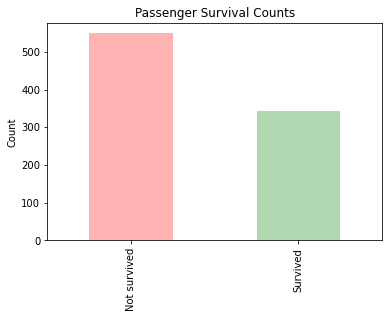

In [115]:
# visualize the number of survived passengers
LABEL = ['Not survived', 'Survived']
df_survived = train_data[['Survived']].value_counts()
df_survived.plot(kind='bar', color=['red', 'green'], alpha=.3)

plt.title('Passenger Survival Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), LABEL)
plt.show()

## Gender

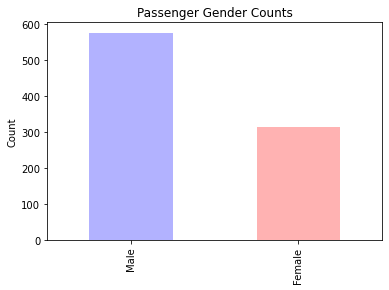

In [116]:
# visualize the count of passenger genders
GENDER = ['Male', 'Female']
df_sex = train_data[['Sex']].value_counts()
df_sex.plot(kind='bar', color=['blue', 'red'], alpha=.3)

plt.title('Passenger Gender Counts')
plt.xlabel('')
plt.ylabel('Count')
plt.xticks(np.arange(2), GENDER)

plt.show()

In [117]:
# group the passengers who survived by gender
df_survived_gender = train_data[['Survived', 'Sex']].value_counts()
df_survived_gender = pd.pivot_table(df_survived_gender.to_frame(), values=0, index=['Survived', 'Sex'], aggfunc=np.sum)
df_survived_gender = df_survived_gender.reset_index()
df_survived_gender = df_survived_gender.rename(columns={0: 'Counts'})

df_survived_gender

,Survived,Sex,Counts
0,0,0,468
1,0,1,81
2,1,0,109
3,1,1,233


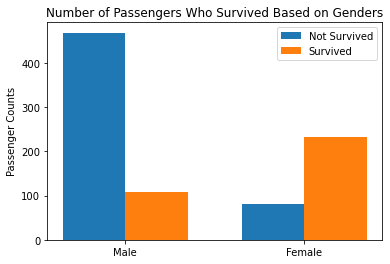

In [118]:
# number of passengers who didn't survive grouped by gender
x = np.arange(len(GENDER))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

ax.bar(x - width/2, df_survived_gender[df_survived_gender['Survived'] == 0]['Counts'], width)
ax.bar(x + width/2, df_survived_gender[df_survived_gender['Survived'] == 1]['Counts'], width)
# plt.xticks(np.arange(2), GENDER)
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Genders')
ax.set_xticks(x)
ax.set_xticklabels(GENDER)
ax.legend(['Not Survived', 'Survived'])

plt.show()

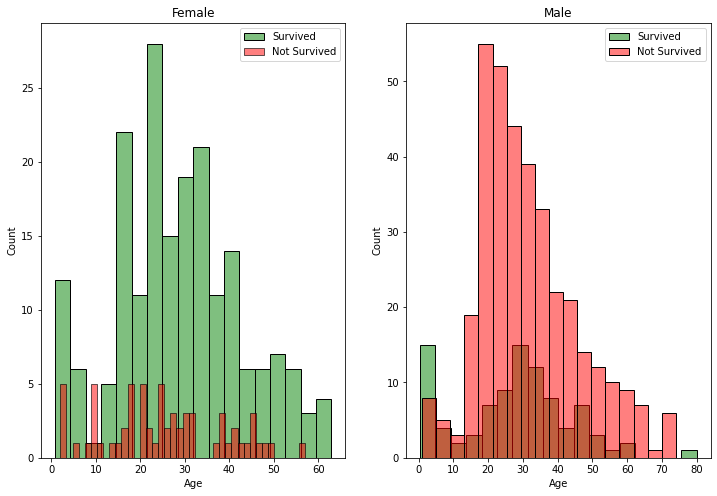

In [119]:
### passengers grouped by gender and age
female = train_data[train_data['Sex'] == 1]
male = train_data[train_data['Sex'] == 0]

fig, axes = plt.subplots(1, 2, figsize=(12,8))
ax = sns.histplot(female[female['Survived'] == 1].Age.dropna(), label='Survived', bins=18, kde=False, ax=axes[0], color='green', alpha=0.5)
ax = sns.histplot(female[female['Survived'] == 0].Age.dropna(), label='Not Survived', bins=40, kde=False, ax=axes[0], color='red', alpha=0.5)
axes[0].legend()
axes[0].set_title('Female')

ax = sns.histplot(male[male['Survived'] == 1].Age.dropna(), label='Survived', bins=18, kde=False, ax=axes[1], color='green', alpha=0.5)
ax = sns.histplot(male[male['Survived'] == 0].Age.dropna(), label='Not Survived', bins=18, kde=False, ax=axes[1], color='red', alpha=0.5)
ax.legend()
ax.set_title('Male')

plt.show()

## Ticket Class (PClass)

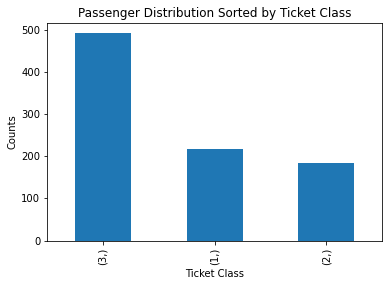

In [120]:
# visualize the count of ticket class
df_pclass = train_data[['Pclass']].value_counts()
df_pclass.plot(kind='bar')

plt.title('Passenger Distribution Sorted by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Counts')

plt.show()

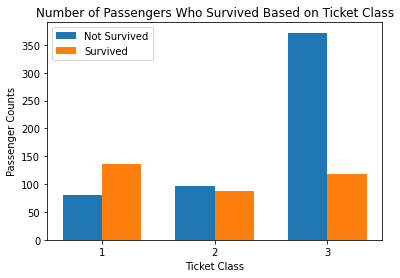

In [121]:
# visualize passengers who survived based on ticket class
TICKET = ['1', '2', '3']
df_survived_pclass = train_data[['Pclass', 'Survived']].value_counts()
df_survived_pclass  = pd.pivot_table(df_survived_pclass.to_frame(), values=0, index=['Survived', 'Pclass'], aggfunc=np.sum)
df_survived_pclass  = df_survived_pclass.reset_index()
df_survived_pclass  = df_survived_pclass.rename(columns={0: 'Counts'})

fig, ax = plt.subplots()
x = np.arange(len(TICKET))

ax.bar(x - width/2, df_survived_pclass[df_survived_pclass['Survived'] == 0]['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_survived_pclass[df_survived_pclass['Survived'] == 1]['Counts'], width, label='Survived')

ax.set_xlabel('Ticket Class')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Ticket Class')
ax.set_xticks(x)
ax.set_xticklabels(TICKET)
ax.legend()

plt.show()
# df_survived_pclass.plot(kind='bar')
# plt.title('Number of Passengers Who Survived Based on Ticket Class')
# plt.ylabel('Passengers Survived')
# plt.xlabel('Ticket Class')

# plt.show()

## Age

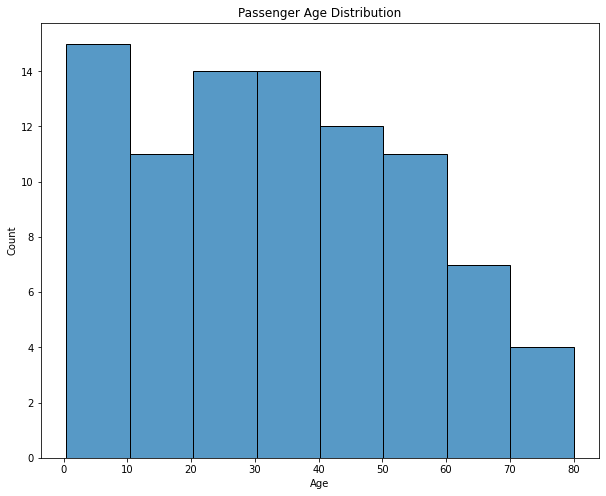

In [122]:
# visualize age distribution
df_age = train_data[['Age']].value_counts()
plt.figure(figsize=(10,8))
sns.histplot(data=df_age, x='Age')

plt.title('Passenger Age Distribution')
# plt.xlabel('Age')
# plt.ylabel('Counts')

plt.show()

## Embarked

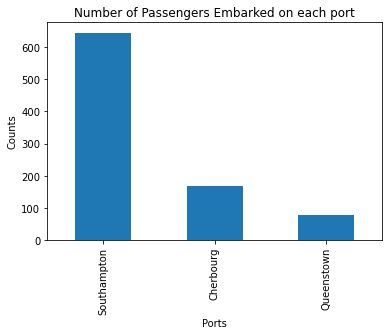

In [123]:
# visualize the number of passengers based on port of embarktion
PORTS = ['Southampton', 'Cherbourg', 'Queenstown']
df_port = train_data[['Embarked']].value_counts()
df_port.plot(kind='bar')

plt.title('Number of Passengers Embarked on each port')
plt.xlabel('Ports')
plt.ylabel('Counts')
plt.xticks(np.arange(3), PORTS)

plt.show()

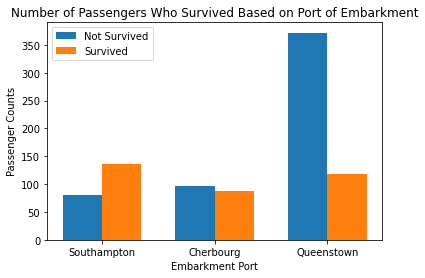

In [124]:
df_survived_port = train_data[['Embarked', 'Survived']].value_counts()
df_survived_port  = pd.pivot_table(df_survived_port.to_frame(), values=0, index=['Survived', 'Embarked'], aggfunc=np.sum)
df_survived_port  = df_survived_port.reset_index()
df_survived_port  = df_survived_port.rename(columns={0: 'Counts'})

fig, ax = plt.subplots()
x = np.arange(len(PORTS))

ax.bar(x - width/2, df_survived_pclass[df_survived_pclass['Survived'] == 0]['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_survived_pclass[df_survived_pclass['Survived'] == 1]['Counts'], width, label='Survived')

ax.set_xlabel('Embarkment Port')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Port of Embarkment')
ax.set_xticks(x)
ax.set_xticklabels(PORTS)
ax.legend()

plt.show()

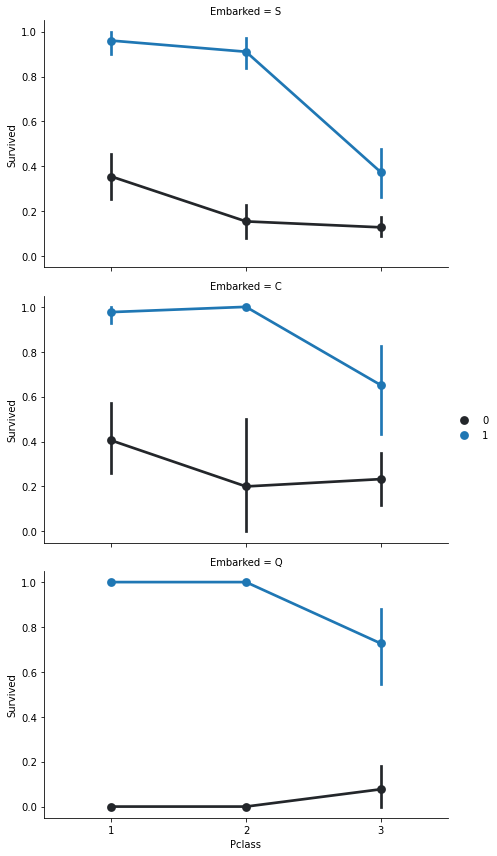

In [125]:
facet_grid = sns.FacetGrid(train_data, row='Embarked', height=4, aspect=1.6)
facet_grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None)
facet_grid.add_legend()

plt.show()

## Number of Siblings/Spouses (SibSp)

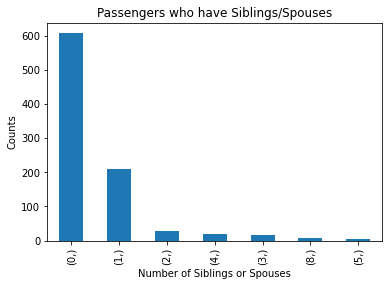

In [126]:
# visualize the number of passengers who have siblings or spouses
df_sibsp = train_data[['SibSp']].value_counts()
df_sibsp.plot(kind='bar')

plt.title('Passengers who have Siblings/Spouses')
plt.xlabel('Number of Siblings or Spouses')
plt.ylabel('Counts')

plt.show()

In [145]:
df_temp_sibsp2

,Survived,Counts
SibSp,,
0,1,210
1,1,112
2,1,13
3,1,4
4,1,3
8,1,0


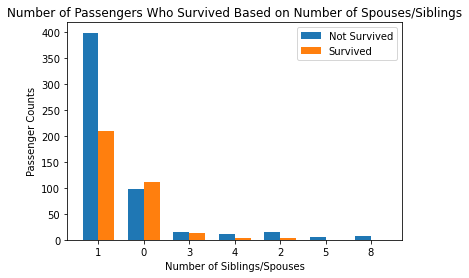

In [154]:
# visualize passengers who have siblings/spouses against survival rate
SIBSP = train_data.SibSp.unique()

df_survived_sibsp = train_data[['SibSp', 'Survived']].value_counts()
df_survived_sibsp = pd.pivot_table(df_survived_sibsp.to_frame(), values=0, index=['Survived', 'SibSp'], aggfunc=np.sum)
df_survived_sibsp = df_survived_sibsp.reset_index()
df_survived_sibsp = df_survived_sibsp.rename(columns={0: 'Counts'})

df_temp_sibsp = df_survived_sibsp[df_survived_sibsp['Survived'] == 0]
df_temp_sibsp2 = df_survived_sibsp[df_survived_sibsp['Survived'] == 1]

df_temp_sibsp.set_index('SibSp', inplace=True)
df_temp_sibsp2.set_index('SibSp', inplace=True)
d = pd.DataFrame([[1, 0], [1, 0]], columns=['Survived','Counts'])
df_temp_sibsp2 = df_temp_sibsp2.append(d)
# df_temp_sibsp2.loc[5] = [1,0]
# df_temp_sibsp2.loc[8] = [1,0]

# for i in range(len(df_temp_sibsp)):
#     df_temp_sibsp2.loc[i] = 0
    
# df_temp_sibsp2 = df_temp_sibsp2.sort_index()

# for i in range(7, len(df_temp_sibsp2)):
#     df_temp_sibsp.loc[i] = 0

fig, ax = plt.subplots()
x = np.arange(len(SIBSP))

ax.bar(x - width/2, df_temp_sibsp['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp_sibsp2['Counts'], width, label='Survived')

ax.set_xlabel('Number of Siblings/Spouses')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Number of Spouses/Siblings')
ax.set_xticks(x)
ax.set_xticklabels(SIBSP)
ax.legend()

plt.show()

## Number of Parents/Children (Parch)

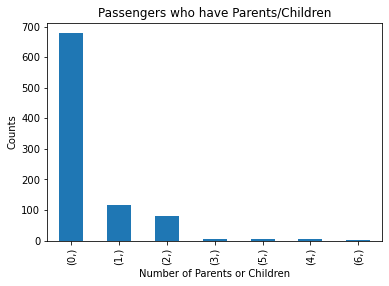

In [155]:
# visualize the number of passengers who have parents or children
df_parch = train_data[['Parch']].value_counts()
df_parch.plot(kind='bar')

plt.title('Passengers who have Parents/Children')
plt.xlabel('Number of Parents or Children')
plt.ylabel('Counts')

plt.show()

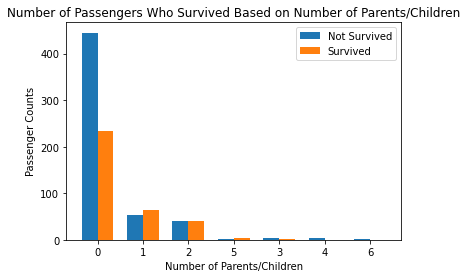

In [157]:
# visualize passengers who have parents/children against survival rate
PARCH = train_data.Parch.unique()

df_survived_parch = train_data[['Parch', 'Survived']].value_counts()
df_survived_parch = pd.pivot_table(df_survived_parch.to_frame(), values=0, index=['Survived', 'Parch'], aggfunc=np.sum)
df_survived_parch = df_survived_parch.reset_index()
df_survived_parch = df_survived_parch.rename(columns={0: 'Counts'})

df_temp_parch = df_survived_parch[df_survived_parch['Survived'] == 0]
df_temp_parch2 = df_survived_parch[df_survived_parch['Survived'] == 1]

df_temp_parch.set_index('Parch', inplace=True)
df_temp_parch2.set_index('Parch', inplace=True)
d = pd.DataFrame([[1, 0], [1, 0]], columns=['Survived','Counts'])
df_temp_parch2 = df_temp_parch2.append(d)

# for i in range(len(df_temp_sibsp)):
#     df_temp_sibsp2.loc[i] = 0
    
# df_temp_sibsp2 = df_temp_sibsp2.sort_index()

# for i in range(7, len(df_temp_sibsp2)):
#     df_temp_sibsp.loc[i] = 0

fig, ax = plt.subplots()
x = np.arange(len(PARCH))

ax.bar(x - width/2, df_temp_parch['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp_parch2['Counts'], width, label='Survived')

ax.set_xlabel('Number of Parents/Children')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Number of Parents/Children')
ax.set_xticks(x)
ax.set_xticklabels(PARCH)
ax.legend()

plt.show()

## Fare

Text(0, 0.5, 'Counts')

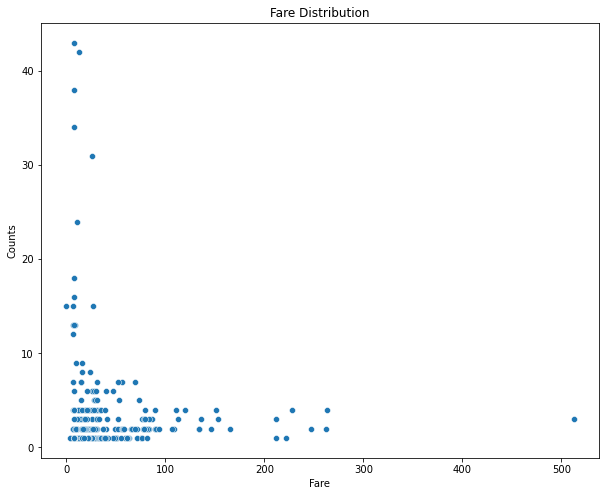

In [158]:
# visualize fare distribution
df_fare = train_data[['Fare']].value_counts()
df_fare = df_fare.reset_index()

plt.figure(figsize=(10,8))
plt.title('Fare Distribution')
sns.scatterplot(x=df_fare['Fare'], y=df_fare[0], data=df_fare)
plt.ylabel('Counts')

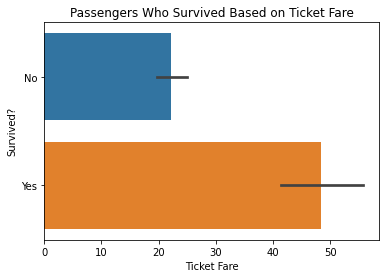

In [159]:
# visualize relattionship between fare against survival
SURVIVED = ['No', 'Yes']

df_survived_fare = train_data[['Fare', 'Survived']]
sns.barplot(x=df_survived_fare['Fare'], y=df_survived_fare['Survived'], data=df_survived_fare, orient='h')

plt.title('Passengers Who Survived Based on Ticket Fare')
plt.yticks(np.arange(2), SURVIVED)
plt.ylabel('Survived?')
plt.xlabel('Ticket Fare')

plt.show()

## Pearson Correlation

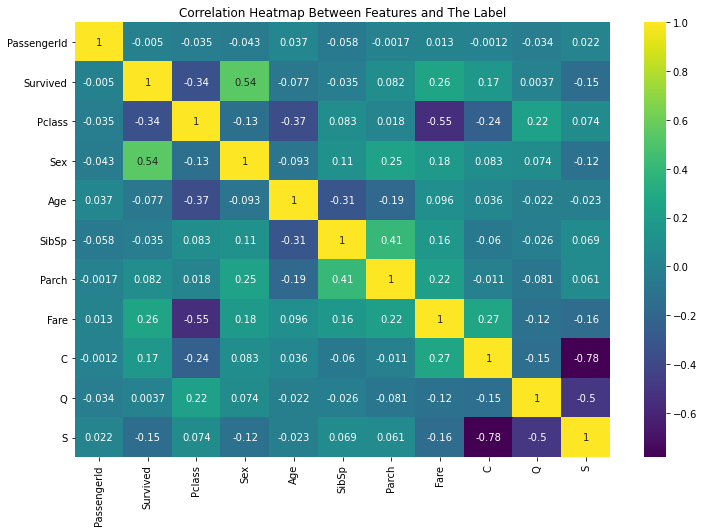

In [160]:
# pearson correlation against features and label
train_corr = train_data.corr()
plt.figure(figsize=(12,8))

sns.heatmap(train_corr, annot=True, cmap='viridis')
plt.title('Correlation Heatmap Between Features and The Label')

plt.show()

## Feature Engineering

In [161]:
import re

In [162]:
title_list = []
for p_name in train_data['Name']:
    title = re.findall(r'(Mr|Mrs|Ms|Miss|Mister|Lady|Sir|Dr|Mme|Master|Major|Rev|Don|Col|Mlle|Capt|Countess|Jonkheer|Dona)\.', p_name)
    title_list.append(title[0])
    
train_data['Title'] = title_list

title_list = []
for p_name in test_data['Name']:
    title = re.findall(r'(Mr|Mrs|Ms|Miss|Mister|Lady|Sir|Dr|Mme|Master|Major|Rev|Don|Col|Mlle|Capt|Countess|Jonkheer|Dona)\.', p_name)
    title_list.append(title[0])
    
test_data['Title'] = title_list

In [165]:
df_temp

,Survived,Counts
Title,,
Capt,0,1
Col,0,1
Don,0,1
Dr,0,4
Jonkheer,0,1
Major,0,1
Master,0,17
Miss,0,55
Mr,0,436


In [190]:
TITLE = train_data.Title.unique()

df_survived_title = train_data[['Title', 'Survived']].value_counts()
df_survived_title = pd.pivot_table(df_survived_title.to_frame(), values=0, index=['Survived', 'Title'], aggfunc=np.sum)
df_survived_title = df_survived_title.reset_index()
df_survived_title = df_survived_title.rename(columns={0: 'Counts'})

df_temp = df_survived_title[df_survived_title['Survived'] == 0]
df_temp2 = df_survived_title[df_survived_title['Survived'] == 1]
df_temp.set_index('Title', inplace=True)
df_temp2.set_index('Title', inplace=True)

print('Title from "Not Survived" that is not in "Survived" category')
for c in df_temp.index.get_level_values(0):
    if c not in df_temp2.index.get_level_values(0):
        print(c)
        
print('\nTitle from "Survived" that is not in "Not Survived" category')
for c in df_temp2.index.get_level_values(0):
    if c not in df_temp.index.get_level_values(0):
        print(c)

Title from "Not Survived" that is not in "Survived" category
Capt
Don
Jonkheer
Rev

Title from "Survived" that is not in "Not Survived" category
Countess
Lady
Mlle
Mme
Ms
Sir


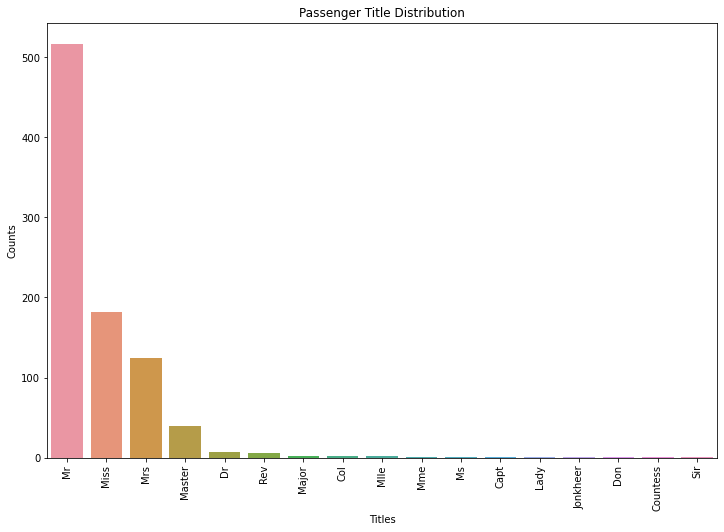

In [168]:
df_title = train_data[['Title']].value_counts()
df_title = df_title.to_frame()
df_title = df_title.reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x='Title', y=0, data=df_title)

plt.title('Passenger Title Distribution')
plt.xlabel('Titles')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

ValueError: shape mismatch: objects cannot be broadcast to a single shape

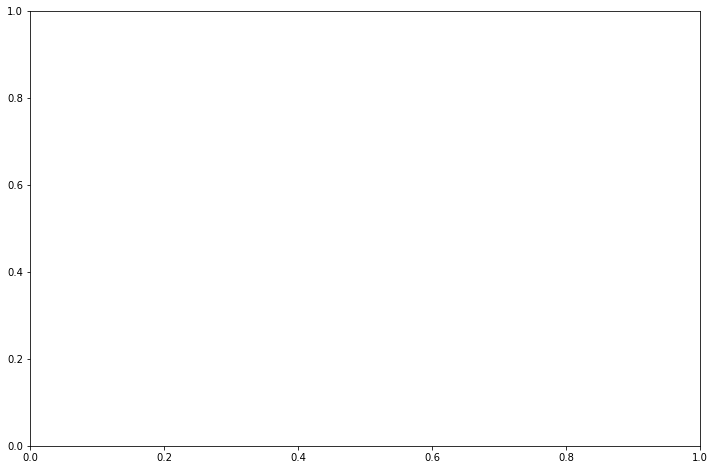

In [169]:
fig, ax = plt.subplots(figsize=(12,8))
x = np.arange(len(TITLE))

ax.bar(x - width/2, df_temp['Counts'], width, label='Not Survived')
ax.bar(x + width/2, df_temp2['Counts'], width, label='Survived')

ax.set_xlabel('Titles')
ax.set_ylabel('Passenger Counts')
ax.set_title('Number of Passengers Who Survived Based on Titles')
ax.set_xticks(x)
ax.set_xticklabels(TITLE)
ax.legend()

plt.xticks(rotation=90)
plt.show()

In [170]:
# don't forget to convert 'Title' column values into one-hot
title_onehot = pd.get_dummies(train_data['Title'])
for c in title_onehot.columns:
    train_data[c] = title_onehot[c]

title_onehot = pd.get_dummies(test_data['Title'])
for c in title_onehot.columns:
    test_data[c] = title_onehot[c]

In [171]:
print(train_data.columns)
print(test_data.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'Title',
       'Capt', 'Col', 'Countess', 'Don', 'Dr', 'Jonkheer', 'Lady', 'Major',
       'Master', 'Miss', 'Mlle', 'Mme', 'Mr', 'Mrs', 'Ms', 'Rev', 'Sir'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'Title', 'Col',
       'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'],
      dtype='object')


## Model Building

In [200]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

In [201]:
test_data.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'C', 'Q', 'S', 'Title', 'Col',
       'Dona', 'Dr', 'Master', 'Miss', 'Mr', 'Mrs', 'Ms', 'Rev'],
      dtype='object')

In [ ]:
# build a prediction model
X = train_data[['Pclass', 'Sex', 'SibSp', 'Parch']].to_numpy()
X_test = test_data[['Pclass', 'Sex', 'SibSp', 'Parch']].to_numpy()
X2 = train_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X_test2 = test_data[['Pclass', 'Sex', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X3 = train_data[['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()
X_test3 = test_data[['Pclass', 'Sex', 'Fare', 'SibSp', 'Parch', 'C', 'Q', 'S']].to_numpy()

y = train_data['Survived'].to_numpy()

model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=1)
model.fit(X3, y)
train_preds = model.predict(X3)
print('Training accuracy: {:.2f}%'.format(accuracy_score(y, train_preds) * 100))

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X3, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print('Cross-validatiton accuracy: {:.2f}%'.format(np.mean(n_scores) * 100))

Training accuracy: 82.04%


## Submission

In [ ]:
test_preds = model.predict(X_test)
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': test_preds})
output.to_csv('titanic_embarked_one_hot_rf_submission.csv', index=False)
print("Submission saved!")

In [ ]:
import requests
import io
import re

url="https://github.com/thisisjasonjafari/my-datascientise-handcode/raw/master/005-datavisualization/titanic.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))
 
test_labels = c
test = pd.read_csv('./data/test.csv')

# warnings.filterwarnings('ignore')

for i, name in enumerate(test_labels['name']):
    if '"' in name:
        test_labels['name'][i] = re.sub('"', '', name)
        
for i, name in enumerate(test['Name']):
    if '"' in name:
        test['Name'][i] = re.sub('"', '', name)
        
survived = []

for name in test['Name']:
    survived.append(int(test_labels.loc[test_labels['name'] == name]['survived'].values[-1]))

    
# submission = pd.read_csv('./data/gender_submission.csv')
# submission['Survived'] = survived
# submission.to_csv('submission_titanic.csv', index=False)


## with FastAI

In [ ]:
import fastai2
import fastcore
from fastai2.tabular.all import *

In [ ]:
fastcore.__version__

In [ ]:
train_df = pd.read_csv('./data/train-extended.csv')
test_df = pd.read_csv('./data/test-extended.csv')

In [ ]:
train_df.dtypes

In [ ]:
grouped_columns = train_df.columns.to_series().groupby(train_df.dtypes).groups
grouped_columns

In [ ]:
cont_types = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'WikiId', 'Age_wiki', 'Class']
cat_types = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body']

In [ ]:
splits = RandomSplitter(valid_pct=.2)(range_of(train_df))
tabular_pandas = TabularPandas(train_df, procs=[Categorify, FillMissing, Normalize],
                              cat_names=cat_types,
                              cont_names = cont_types,
                              y_names='Survived',
                              splits=splits)

In [ ]:
print('Number of training rows:', len(tabular_pandas.train.xs))
print('Training columns:', len(tabular_pandas.train.xs.columns))
tabular_pandas.train.xs

In [ ]:
print('Number of validation rows:', len(tabular_pandas.valid.xs))
print('Validation columns:', len(tabular_pandas.valid.xs.columns))
tabular_pandas.valid.xs

In [ ]:
X_train, y_train = tabular_pandas.train.xs, tabular_pandas.train.ys.values.ravel()
X_valid, y_valid = tabular_pandas.valid.xs, tabular_pandas.valid.ys.values.ravel()

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=1)
rf_model.fit(X_train, y_train)

In [ ]:
train_preds = rf_model.predict(X_train)
valid_preds = rf_model.predict(X_valid)
print('Validation score: {:.2f}%'.format(accuracy_score(y_valid, valid_preds) * 100))
print('Train score: {:.2f}%'.format(accuracy_score(y_train, train_preds) * 100))

In [ ]:
test_df.columns.to_series().groupby(train_df.dtypes).groups

In [ ]:
cont_types = ['PassengerId', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'WikiId', 'Age_wiki', 'Class']
cat_types = ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Name_wiki', 'Hometown', 'Boarded', 'Destination', 'Lifeboat', 'Body']

In [ ]:
test_tabular_pandas = TabularPandas(test_df, procs=[Categorify, FillMissing, Normalize],
                                   cat_names = cat_types,
                                   cont_names = cont_types)

In [ ]:
X_test = test_tabular_pandas.train.xs

In [ ]:
X_test.columns.to_series().groupby(X_test.dtypes).groups

In [ ]:
train_cols = X_train.columns
test_cols = X_test.columns

for cols in test_cols:
    if cols not in train_cols:
        print("{} is not in training columns".format(cols))

In [ ]:
X_test = X_test.drop(['Fare_na'], axis=1)

In [ ]:
test_preds = rf_model.predict(X_test)
test_preds = test_preds.astype(int)

In [ ]:
output = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': test_preds})
output.to_csv('titanic_fastai2_submission.csv', index=False)
print("Submission saved!")